In [255]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

# Vector Semantics Lab

## Cosine Similarity
We can compute the Cosine distance between 1-D arrays using scipy. It is defined as such:

  $cos(u, v) = 1 - \frac{u \cdot v}
              {||u||_2 ||v||_2} = 
              1 - \frac{\sum_{i=1}^{d}u_{i}v_i}
                   {\sqrt{\sum_{i=1}^{d}u_i^2  }   \sqrt{\sum_{i=1}^{d}v_i^2  }}$
              
              
Note, this is a distance, rather than a similarity measure, due to the $1 - \ldots$. Its values are between 0 (identical vectors or those pointing in the same direction) and 1 (orthogonal vectors). As all $u_i$ and $v_i$ are positive (why?), so will be $cos(u,v)$.

In [6]:
from scipy.spatial.distance import cosine as cos
cos?

### A little cosine warmup
Get a feel for it by changing the values such that you create large and small distances.
Can you compare vectors of different sizes? Can you compare the null vector? What happened in the last example?

In [4]:
cos([10,0,0], [9,0,2])

0.023812939816047263

In [5]:
cos([10,0,0], [0,10,3])

1.0

In [18]:
cos([5,2,1], [15,6, 3])

0

Let's reimplement the lecture slides.
Use the cosine distance measure to estimate similarity between documents. Recall the Term document matrix from the slides
![title](Images/slide_termdoc.png)
![title](Images/slide_termdoc2.png)
Recreate this figure, or at least the take-away message that the comedies ("As You Like It" and "Twelfth Night") are similar to each other and different from the dramas, or at least, they should be!
Try with two dimensions (like battle and fool) and keep adding to see, how similarities change. A dataframe is quite convenient for this matter:

In [19]:
import pandas as pd
titles = ['As you like it','Twelfth Night', 'Julius Caesar','Henry V']
words = 'battle good fool wit'.split()
df = pd.DataFrame([[1,0,7,13],
                   [114,80,62,89],
                   [36,58,1,4],
                   [20,15,2,3]], columns=titles, index=words)
df

,As you like it,Twelfth Night,Julius Caesar,Henry V
battle,1,0,7,13
good,114,80,62,89
fool,36,58,1,4
wit,20,15,2,3


In [14]:
cos(df['As you like it'], df['Twelfth Night'])

0.05008748968390353

Ok, makes sense.

In [13]:
cos(df['As you like it'], df['Julius Caesar'])

0.05508961665396295

Still small (distance). How come?

In [12]:
# Hint: here is how you can choose a subset of words
df.loc[['battle', 'good']]

,As you like it,Twelfth Night,Julius Caesar,Henry V
battle,1,0,7,13
good,114,80,62,89


### Words can be vectors too!
Find the cosine distances between the words.
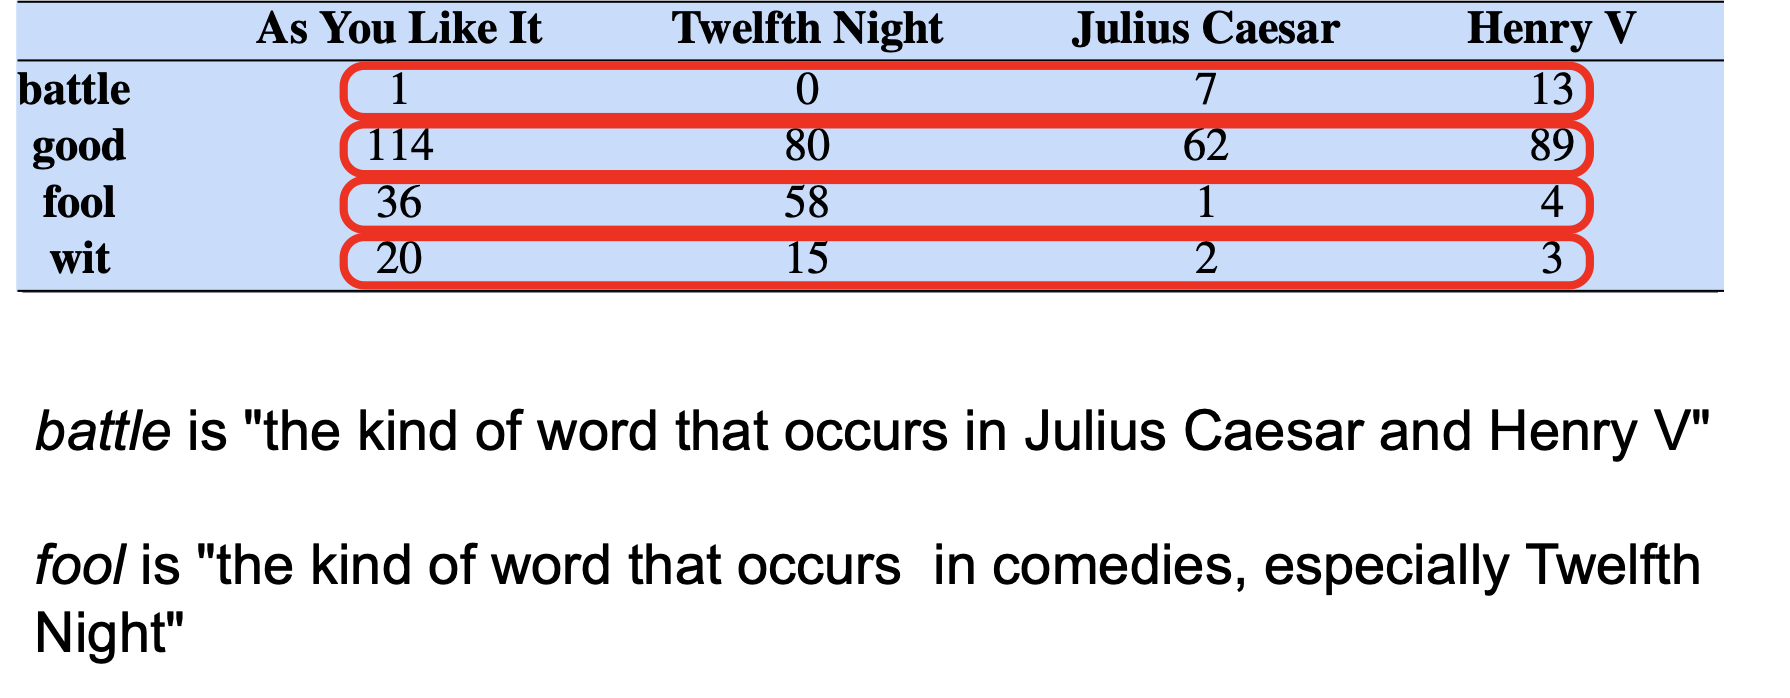

<AxesSubplot:>

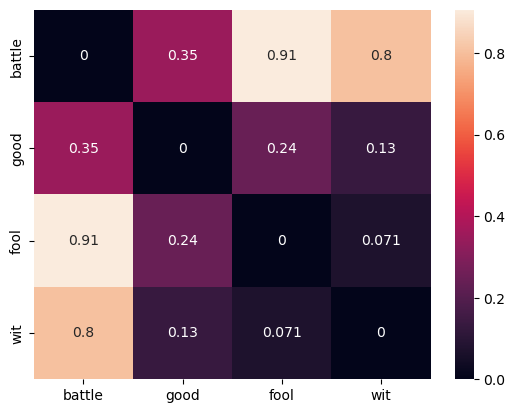

In [25]:
from scipy.spatial.distance import squareform, pdist
import seaborn as sns
allVsall = squareform(pdist(df, cos))
dm = pd.DataFrame(allVsall, index=df.index, columns=df.index)
sns.heatmap(dm, annot=True)

Explain, what is going on int the figure above. Do the same for documents (see below). Hint: transpose. 

<AxesSubplot:>

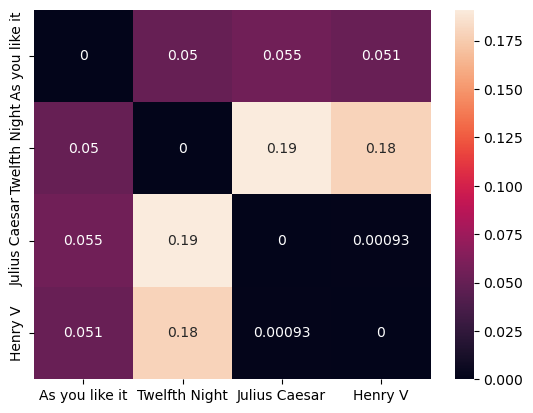

In [26]:
## your code here

## Word2vec with Gensim
Loading the models might take some time, especially if they need to be downloaded (only the first time).

In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

In [27]:
## also load GloVe, for comparison
glove = api.load("glove-twitter-200")

In [49]:
arsenal = model['arsenal']
weaponry = model['weaponry']
apricot = model['apricot']
jam = model['jam']
arsenal

array([ 2.83203125e-01,  3.33984375e-01,  4.29687500e-01, -1.63085938e-01,
        3.34472656e-02,  3.73046875e-01, -1.52343750e-01, -7.71484375e-02,
        3.19824219e-02,  6.64062500e-02,  1.14746094e-01, -2.77343750e-01,
        4.46777344e-02,  1.80664062e-01, -7.81250000e-02, -2.06298828e-02,
        1.59179688e-01,  1.58203125e-01, -1.95312500e-02, -1.74804688e-01,
        6.29882812e-02, -1.66015625e-01,  1.09863281e-01,  1.52343750e-01,
        7.47070312e-02, -3.06640625e-01, -6.54296875e-02, -1.42211914e-02,
       -2.57812500e-01,  9.88769531e-03, -4.58984375e-02, -1.77001953e-02,
       -2.24609375e-01,  4.98046875e-02, -1.23901367e-02,  1.36718750e-01,
        2.07519531e-02,  1.93359375e-01,  2.87109375e-01, -1.73828125e-01,
        2.65625000e-01,  5.93261719e-02,  3.32031250e-02,  8.17871094e-03,
       -2.99072266e-02, -2.42187500e-01,  1.09252930e-02,  2.01416016e-02,
       -1.16699219e-01, -2.25830078e-02,  7.91015625e-02, -9.66796875e-02,
       -1.38854980e-03, -

In [45]:
cos(arsenal, weaponry)

0.44285231828689575

In [50]:
cos(12*arsenal + jam, arsenal)

0.0035750865936279297

In [48]:
cos(12*arsenal, 3*arsenal) 

0

Explain, why is this close to 0 and 0, respectively?

Explore the similarity of related and unrelated word pairs. List them and calulate all similarities, using model.similarity. Compare models.

In [42]:
help(model.similarity)

Help on method similarity in module gensim.models.keyedvectors:

similarity(w1, w2) method of gensim.models.keyedvectors.KeyedVectors instance
    Compute cosine similarity between two keys.
    
    Parameters
    ----------
    w1 : str
        Input key.
    w2 : str
        Input key.
    
    Returns
    -------
    float
        Cosine similarity between `w1` and `w2`.



In [36]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]


In [38]:
for w1, w2 in pairs:
    print(w1, w2, glove.similarity(w1, w2))

car minivan 0.39567423
car bicycle 0.4729451
car airplane 0.4597964
car cereal 0.27325788
car communism 0.057210512


### The odd one out
Play with the below example and find a funny example.

In [58]:
model.doesnt_match('apple pear cherry truck'.split())

'truck'

In [59]:
model.doesnt_match('manchester city,liverpool,arsenal,barcelona'.split(','))

'arsenal'

### Analogy relations: the Parallelogram test
Look at the example below and write a function parallelogram that given three words a, b, c, it returns the closest words to $\overrightarrow{a} - \overrightarrow{b} + \overrightarrow{c}$.
Hint: model.similar_by_vector 

"Apple is to tree as grape is to ..."
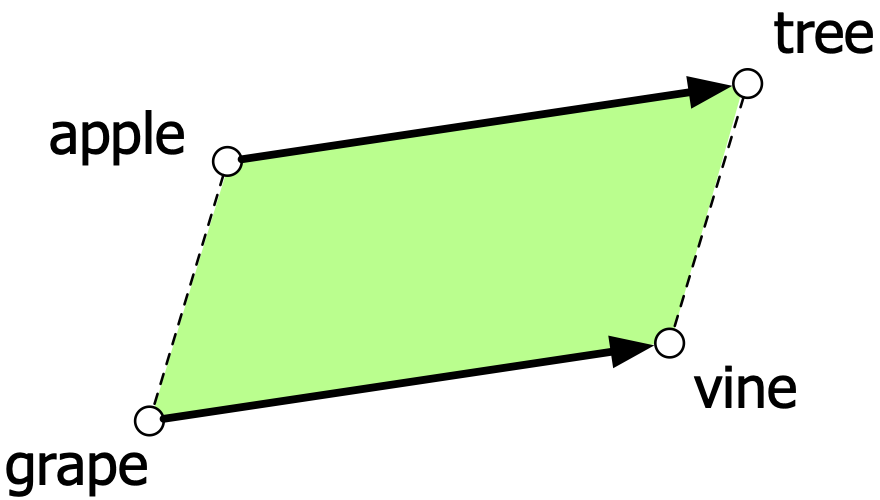
$\overrightarrow{tree} - \overrightarrow{apple} + \overrightarrow{grape} \stackrel{?}{=} \overrightarrow{vine}$

In [62]:
cos(model['tree'] - model['apple'] + model['grape'], model['vine'])

0.4407767057418823

In [306]:
def parallelogram(model,a,b,c, **kwargs):
    k = model[a] - model[b] + model[c]
    return model.similar_by_vector(k, **kwargs)

In [309]:
parallelogram(model, 'paris', 'france', 'japan', topn=3)

[('japan', 0.7073737978935242),
 ('paris', 0.636668860912323),
 ('tokyo', 0.4821012318134308)]

### Cultural bias 😱


In [310]:
parallelogram(model, 'computer_programmer', 'man', 'woman', topn=3)

[('computer_programmer', 0.910581111907959),
 ('homemaker', 0.5771316289901733),
 ('schoolteacher', 0.5500192046165466)]

In [313]:
for person in 'uncle daughter mother son'.split():
    print(person, parallelogram(model, 'doctor', 'father', person, topn=2))

uncle [('doctor', 0.8943919539451599), ('physician', 0.6969043016433716)]
daughter [('doctor', 0.8321408033370972), ('nurse', 0.6653137803077698)]
mother [('doctor', 0.881921648979187), ('nurse', 0.7165822982788086)]
son [('doctor', 0.9248571991920471), ('physician', 0.7305173277854919)]


In [82]:
import re
## find the longest word, starting with a letter (allow '-', ' ' (space) and '_')
word = re.compile('[A-Za-z][A-Za-z0-9-_ ]+$')
max([k for k in model.key_to_index if word.match(k)], key=lambda x:len(x))

'FINANCIAL_HIGHLIGHTS_----------------------------------------------------------'

## Stock2vec - Visualization of Stock titles
300D vectors aren't easy to visualize. 
We will use PCA and t-SNE to bring the data down to visualizability. First some Pandas fun

In [173]:
stocks = pd.read_csv('Data/stocktitles.csv').iloc[:,:4]
stocks.head()

,Symbol,Company Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,39.17B
1,AA,Alcoa,Metals & Mining,7.14B
2,AAC,Ares Acquisition,Blank Check / SPAC,1.24B
3,AACG,ATA Creativity Global,Diversified Consumer Services,59.72M
4,AACI,Armada Acquisition I,Blank Check / SPAC,205.65M


In [174]:
## Fixing the market cap
def numeric(mc):
    if mc.endswith('-'): return 0
    v = float(mc[:-1].replace(',',''))
    if mc.endswith('M'): return v
    if mc.endswith('B'): return 1000*v
    
from collections import Counter
Counter([mc[-1] for mc in stocks['Market Cap']])
stocks['MarketCapMil'] = [numeric(mc) for mc in stocks['Market Cap']]

In [157]:
stocks[stocks.MarketCapMil>100]

,Symbol,Company Name,Industry,Market Cap,MarketCapMil
0,A,Agilent Technologies,Life Sciences Tools & Services,39.17B,39170.00
1,AA,Alcoa,Metals & Mining,7.14B,7140.00
2,AAC,Ares Acquisition,Blank Check / SPAC,1.24B,1240.00
3,AACG,ATA Creativity Global,Diversified Consumer Services,59.72M,59.72
4,AACI,Armada Acquisition I,Blank Check / SPAC,205.65M,205.65


In [378]:
## choosing top ten industries (in terms of market cap)
topInd = stocks.groupby('Industry').sum().sort_values(by='MarketCapMil', ascending=False).head(5)
topInd

,MarketCapMil
Industry,
"Oil, Gas & Consumable Fuels",4384111.39
Software,3899498.19
Interactive Media & Services,3186618.30
Banks,3038584.59
"Technology Hardware, Storage & Periph...",2517810.93


In [379]:
## keeping only titles within the top 10 industries:
stocks2 = stocks[stocks.Industry.isin(topInd.index)]
## keeping only Symbols with at least 3 letters
stocks2 = stocks2[stocks2.Symbol.str.len()>2]
## within the top industries, just go for the big fish
stocks2 = stocks2[stocks2.MarketCapMil>5000]
## keeping only titles that are in the model (alternative, see fastText)
#stocks2['Symbol'] = stocks2.Symbol.apply(lambda x: x.lower())
stocks2 = stocks2[stocks2.Symbol.isin(model.key_to_index)] ## for glove, convert symbol to lower case
stocks2

,Symbol,Company Name,Industry,Market Cap,MarketCapMil
14,AAPL,Apple,"Technology Hardware, Storage & Periph...","2,310.18B",2310180.0
93,ADBE,Adobe,Software,136.21B,136210.0
113,ADSK,Autodesk,Software,43.32B,43320.0
365,ANSS,ANSYS,Software,18.89B,18890.0
379,APA,APA Corporation,"Oil, Gas & Consumable Fuels",13.00B,13000.0
...,...,...,...,...,...
7116,XOM,Exxon Mobil,"Oil, Gas & Consumable Fuels",420.10B,420100.0
7152,YNDX,Yandex,Interactive Media & Services,6.80B,6800.0
7157,YPF,YPF Sociedad Anonima,"Oil, Gas & Consumable Fuels",5.90B,5900.0
7174,ZEN,Zendesk,Software,9.47B,9470.0


In [380]:
stocks2.Industry.value_counts()

Banks                                       66
Oil, Gas & Consumable Fuels                 65
Software                                    44
Technology Hardware, Storage & Periph...    11
Interactive Media & Services                 9
Name: Industry, dtype: int64

In [356]:
symbols = stocks2.Symbol
stock2vec = pd.DataFrame([model[symbol] for symbol in symbols], index=symbols)## try also with glove (lower case)
stock2vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.088867,-0.112793,-0.263672,0.206055,-0.267578,-0.500000,-0.129883,0.259766,0.316406,-0.049805,...,0.279297,0.139648,-0.081543,-0.037354,0.144531,-0.048096,-0.248047,-0.001816,-0.099121,0.382812
ADBE,0.141602,-0.206055,-0.237305,0.257812,-0.302734,-0.245117,0.008362,0.174805,-0.065918,-0.112793,...,-0.199219,0.125977,-0.312500,0.009338,0.161133,-0.298828,0.072754,0.015991,0.076172,0.242188
ADSK,-0.169922,-0.281250,-0.322266,0.032471,-0.102051,-0.326172,0.089355,0.106934,0.000896,0.291016,...,-0.182617,0.204102,-0.010498,0.074707,0.200195,-0.245117,0.122559,-0.267578,0.226562,0.257812
ANSS,-0.066406,-0.376953,-0.078613,0.151367,-0.283203,-0.218750,0.077148,-0.067871,0.111816,-0.143555,...,-0.115234,0.113770,-0.162109,0.064941,0.035156,0.138672,-0.090332,0.189453,0.166992,0.246094
APA,-0.228516,-0.205078,-0.136719,-0.240234,-0.077148,-0.240234,0.107422,0.020386,-0.032959,-0.034424,...,0.046387,-0.115234,-0.229492,0.314453,0.052734,0.135742,-0.064941,-0.054688,0.157227,0.142578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,-0.134766,-0.110352,0.132812,0.107422,0.008179,-0.300781,-0.167969,0.132812,0.289062,0.125977,...,-0.042480,-0.041016,0.001411,-0.011292,-0.164062,-0.118164,-0.019775,0.046631,0.300781,0.410156
ZEN,-0.008362,0.153320,-0.013489,0.027832,-0.214844,-0.008728,0.020996,-0.363281,-0.066895,-0.157227,...,-0.049316,0.154297,0.291016,0.042969,0.191406,-0.223633,-0.002060,-0.106445,-0.122070,0.183594
ZI,-0.150391,-0.219727,-0.125000,0.135742,0.127930,-0.148438,-0.051514,-0.174805,-0.308594,0.017944,...,0.035156,-0.139648,-0.051514,0.122559,-0.086914,-0.161133,-0.018677,0.116699,-0.164062,0.094238


<AxesSubplot:ylabel='Symbol'>

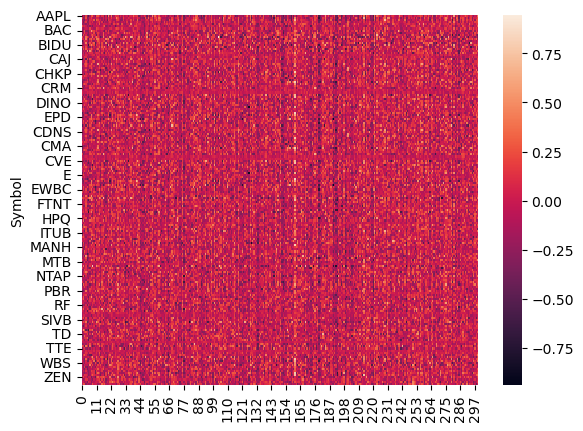

In [357]:
sns.heatmap(stock2vec)

/Users/ahenschel/Applications/miniconda3/envs/speech/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


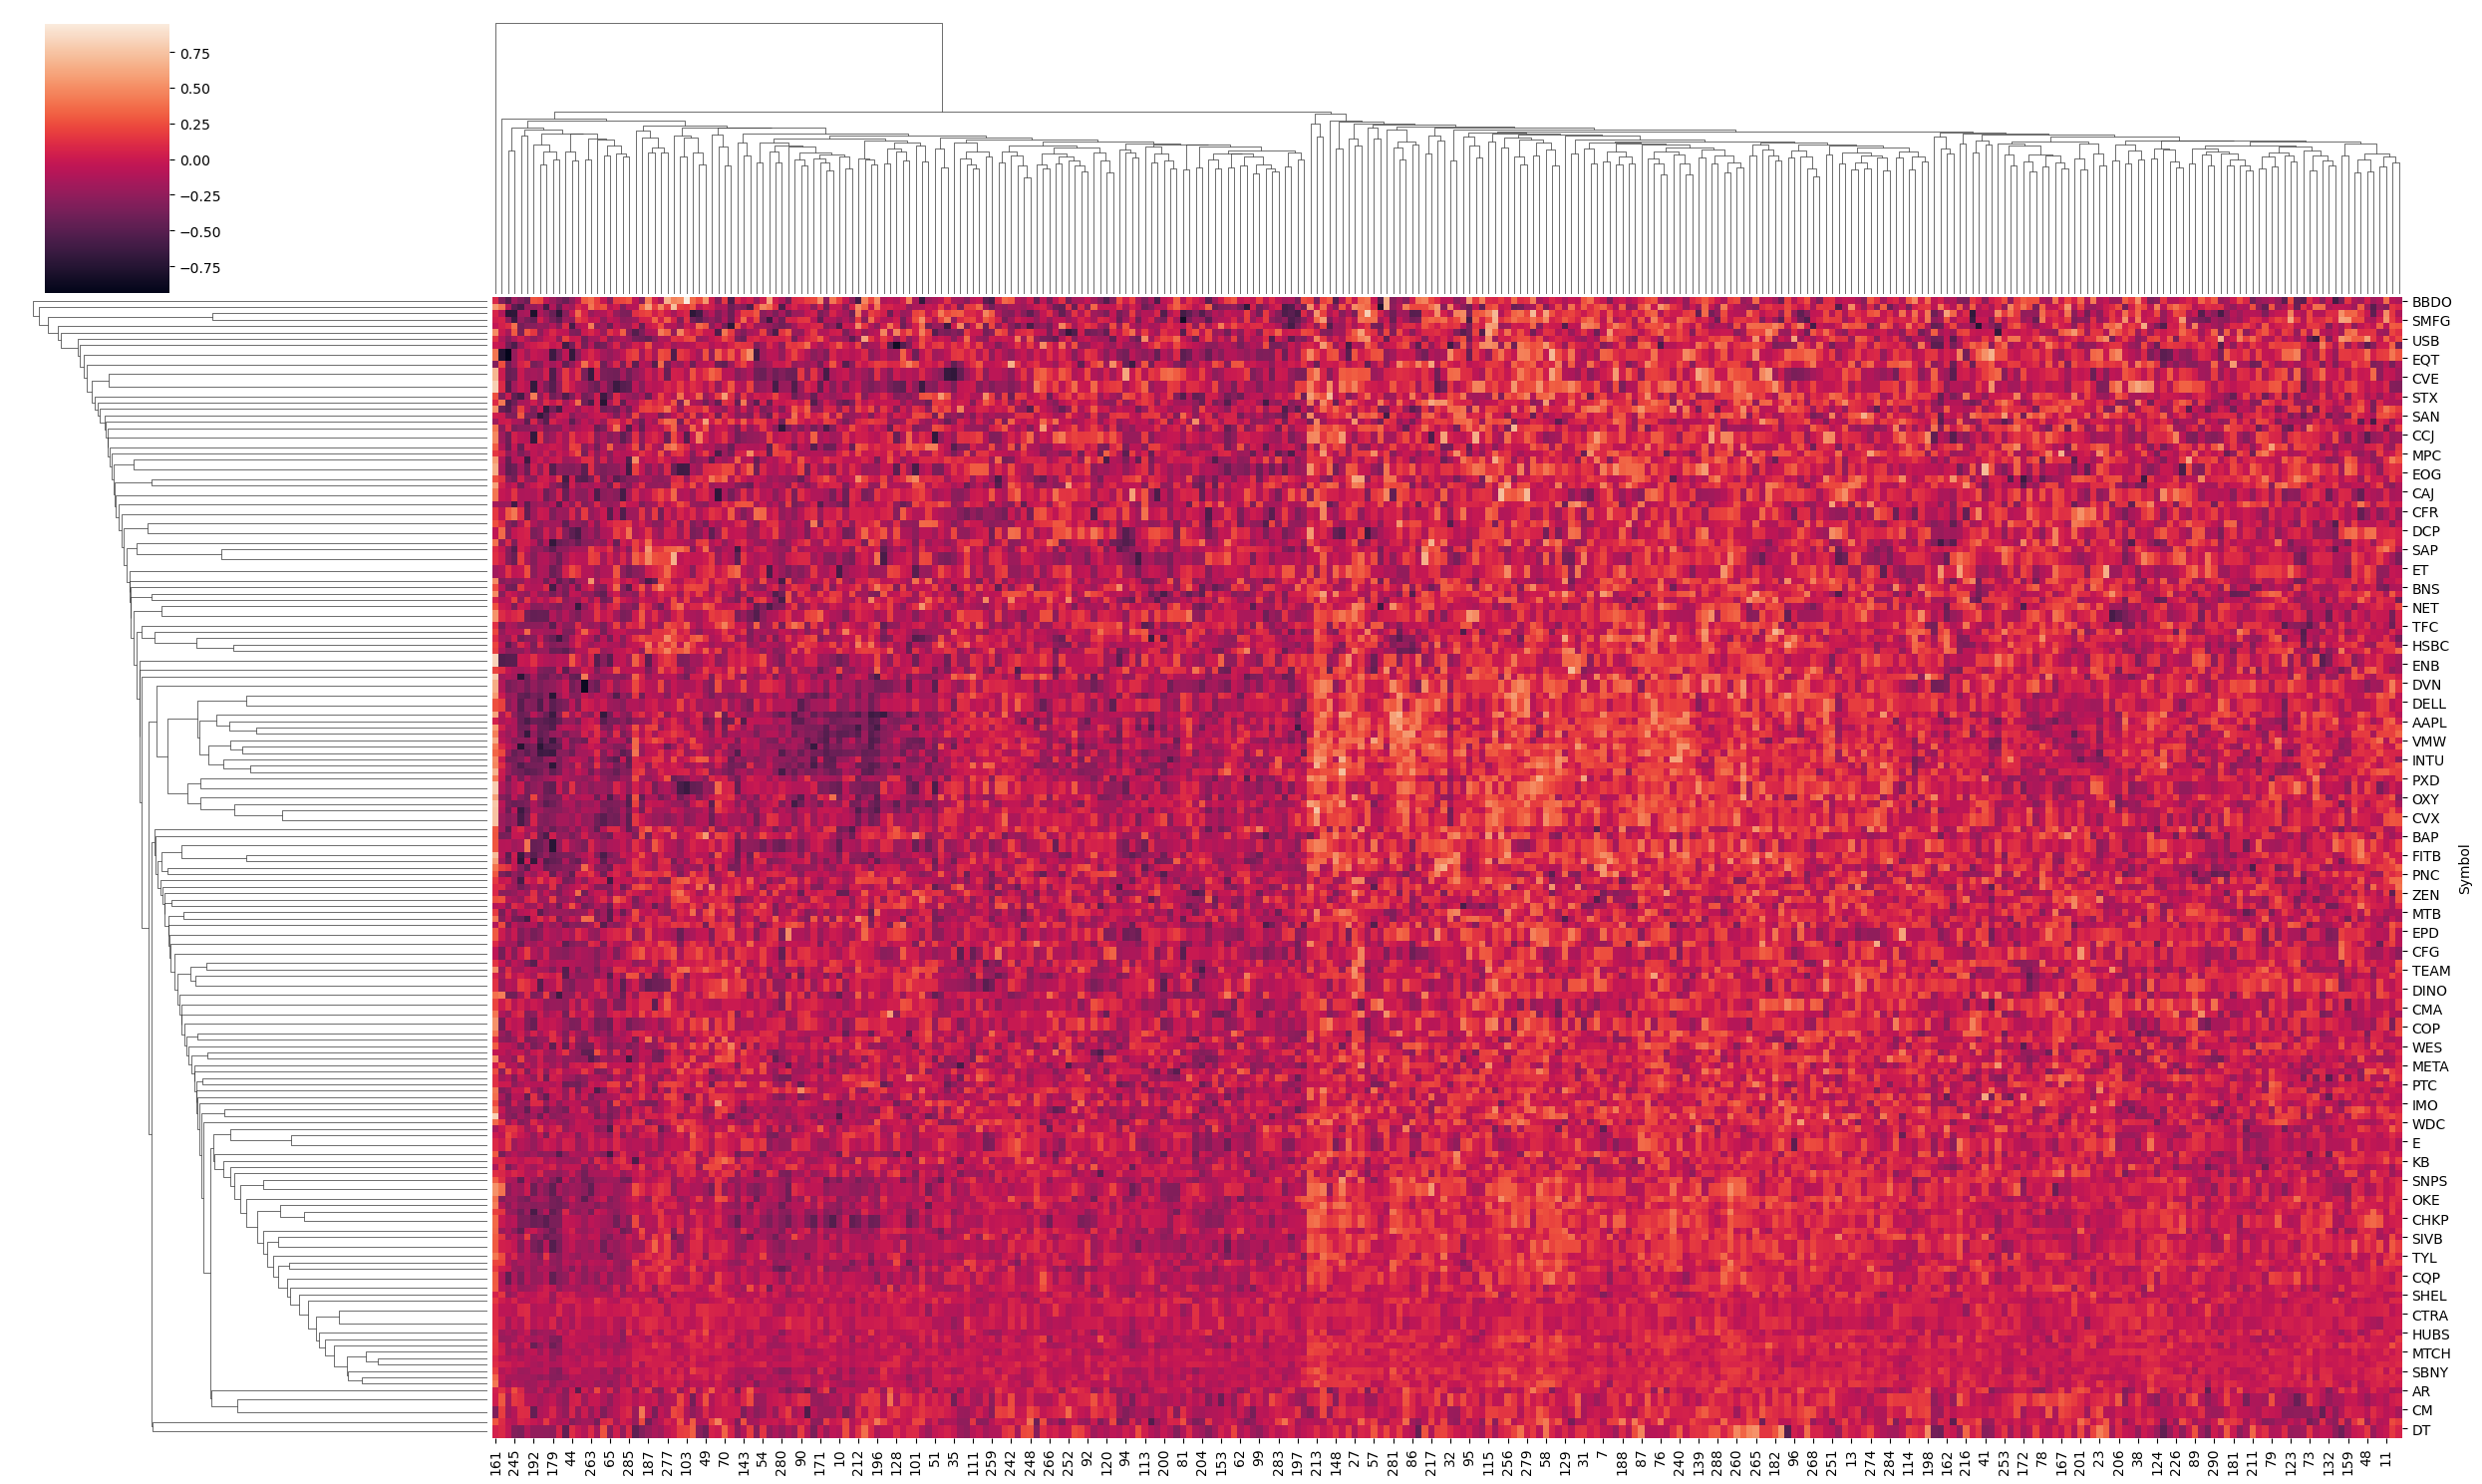

In [358]:
sns.clustermap(stock2vec, figsize=(25,15))

### More disambiguation
Here is an idea: try to modify the stock2vec table, such that not only the symbol but also the industry terms, i.e., their vector(s), define the vector representation. You can preprocess (tokenize) also with gensim:

In [332]:
from gensim.utils import simple_preprocess
simple_preprocess("Semiconductors & Semiconductor Equipment	")

['semiconductors', 'semiconductor', 'equipment']

In [391]:
row = stocks2.iloc[0]
terms = [row.Symbol, 'stock'] + simple_preprocess(row['Industry']) + simple_preprocess(row['Company Name']) 
terms = [term for term in terms if term in model.index_to_key]
print(terms)
model.most_similar(positive=terms, topn=10)

['AAPL', 'stock', 'technology', 'hardware', 'storage', 'apple']


[('Decelles_salesman', 0.6103911995887756),
 ('gigabyte_iPod_shuffle', 0.6060816645622253),
 ('iPads_outdoing', 0.6032822132110596),
 ('Compellent_CML', 0.5960370898246765),
 ('1GB_iPod_shuffle', 0.5927865505218506),
 ('LTO4_tape', 0.5914632678031921),
 ('Apple_Nasdaq_AAPL', 0.5885843634605408),
 ('Network_Appliance_NTAP', 0.5840845704078674),
 ('PowerPC_chip', 0.5839260220527649),
 ('DRAM_SRAM', 0.5836799144744873)]

Note: model can take a list of n words, returns a $n\times300$ matrix


In [392]:
centroid = model[terms].mean(axis=0)
model.similar_by_vector(centroid)

[('AAPL', 0.6708390712738037),
 ('Apple_Nasdaq_AAPL', 0.6247062683105469),
 ('hardware', 0.6217644810676575),
 ('gigabyte_iPod_shuffle', 0.6180017590522766),
 ('iPads_outdoing', 0.6089394092559814),
 ('Compellent_CML', 0.6065844893455505),
 ('Network_Appliance_NTAP', 0.6029448509216309),
 ('SanDisk_SNDK', 0.6026925444602966),
 ('1GB_iPod_shuffle', 0.6019710898399353),
 ('NetLogic_Microsystems_NETL', 0.6015741229057312)]

In [393]:
def findRelated(row):
    terms = [row.Symbol, 'stock'] + simple_preprocess(row['Industry']) + simple_preprocess(row['Company Name']) 
    terms = [term for term in terms if term in model.index_to_key]
    return model[terms].mean(axis=0)                                                                         

stock2vec = pd.DataFrame([findRelated(row) for i, row in stocks2.iterrows()], index=stocks2.Symbol)
stock2vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.033447,-0.025370,-0.044896,0.065979,-0.081055,-0.050064,0.092896,-0.038605,0.172256,0.135986,...,-0.117025,0.077738,-0.075155,0.005310,0.147685,-0.076294,0.028971,0.052330,-0.016398,0.189865
ADBE,0.122925,-0.188843,-0.112366,0.231934,-0.097656,-0.095825,0.118179,0.152863,0.123993,0.094788,...,-0.192383,0.094116,-0.135010,0.147690,0.299561,-0.010803,0.092896,0.011383,0.026901,0.180908
ADSK,0.104736,-0.246460,-0.121399,0.139465,-0.038696,-0.079712,0.075928,0.122711,0.108867,0.159729,...,-0.168701,0.166992,-0.138367,0.025833,0.237061,-0.038391,0.072998,-0.012878,0.020508,0.218506
ANSS,0.069987,-0.258952,-0.048096,0.132487,-0.087891,-0.124186,0.068522,0.067586,0.233561,0.052653,...,-0.116536,0.146973,-0.205729,0.034465,0.168620,0.046143,0.055827,0.143636,0.063151,0.181966
APA,-0.068268,-0.002594,-0.082806,0.055315,-0.070496,-0.084290,0.009163,-0.180176,0.058533,0.057106,...,-0.096825,-0.059578,-0.175781,0.141541,0.002289,-0.010864,0.051407,0.058105,0.087708,0.095340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XOM,-0.034721,0.021667,-0.094002,0.086082,-0.087662,-0.065430,-0.038391,-0.225937,0.063354,0.101852,...,-0.025963,-0.028275,-0.106971,0.089355,-0.026764,-0.031372,0.056549,0.095337,0.109543,0.074829
YNDX,0.039648,-0.051282,-0.079980,0.008350,0.018176,-0.061011,0.024521,-0.042920,0.133911,-0.068262,...,-0.064221,-0.013281,-0.127344,0.008966,0.128833,-0.041260,0.101807,0.048187,-0.020435,-0.031799
YPF,-0.080287,0.003034,-0.115792,0.095485,-0.073591,-0.105259,0.039097,-0.262259,0.058524,0.085031,...,-0.078552,-0.063459,-0.144636,0.135263,0.039097,0.073521,0.098598,0.149728,0.054426,0.022352


In [394]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(stock2vec)
res.shape

(195, 2)

In [395]:
#uncomment to show T-SNE clustering
tsne = TSNE(2)
res = tsne.fit_transform(stock2vec)

/Users/ahenschel/Applications/miniconda3/envs/speech/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahenschel/Applications/miniconda3/envs/speech/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [397]:
import numpy as np

visDF = pd.DataFrame({'x': res[:,0], 'y': res[:,1], 
                      'label': stocks2.Symbol, 
                      'description': stocks2['Company Name'],
                      'industry': stocks2['Industry'],
                      'cap': stocks2['MarketCapMil']//10000 #np.log2(stocks2['MarketCapMil'])
                     })
ind2col = {industry: cols[i] for i,industry in enumerate(set(stocks2['Industry']))}
visDF['col'] = [ind2col[ind] for ind in visDF.industry]
visDF

,x,y,label,description,industry,cap,col
14,5.662019,-7.201739,AAPL,Apple,"Technology Hardware, Storage & Periph...",231.0,#2ca02c
93,14.719258,-3.675582,ADBE,Adobe,Software,13.0,#1f77b4
113,14.388773,-3.829319,ADSK,Autodesk,Software,4.0,#1f77b4
365,12.457797,-3.133616,ANSS,ANSYS,Software,1.0,#1f77b4
379,-9.501146,-17.695189,APA,APA Corporation,"Oil, Gas & Consumable Fuels",1.0,#ff7f0e
...,...,...,...,...,...,...,...
7116,-10.369659,-19.610485,XOM,Exxon Mobil,"Oil, Gas & Consumable Fuels",42.0,#ff7f0e
7152,4.601592,1.636390,YNDX,Yandex,Interactive Media & Services,0.0,#d62728
7157,-13.375534,-20.908375,YPF,YPF Sociedad Anonima,"Oil, Gas & Consumable Fuels",0.0,#ff7f0e
7174,12.683994,-0.814827,ZEN,Zendesk,Software,0.0,#1f77b4


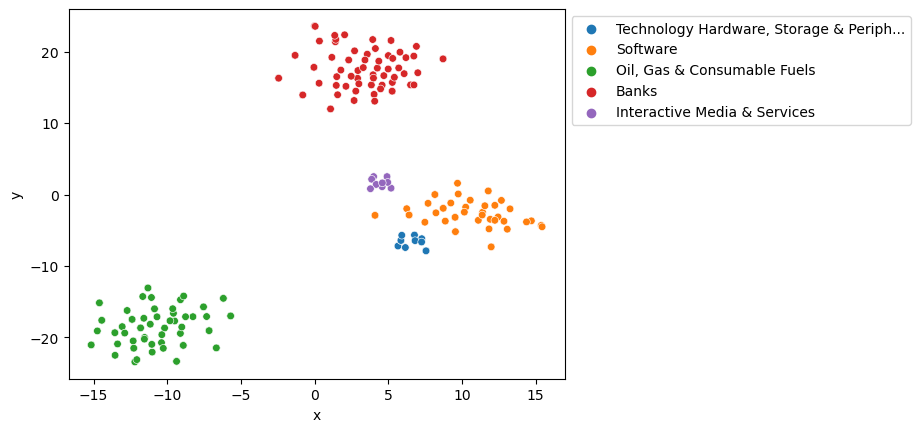

In [399]:
## Plotting with seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
sns.scatterplot(x='x',y='y', data=visDF, hue='industry', ax=ax, s=30)
_=ax.legend(bbox_to_anchor=(1,1), loc=2)

### Interactive graphs with bokeh

In [400]:
cds = ColumnDataSource(visDF)
p = figure(plot_width=800, plot_height=800, tooltips=[("","@label"), ("title", "@description"), ("name", "@industry"), ("cap", "@cap")])
p.scatter(x='x', y='y', color='col', size='cap', source=cds)
show(p)

### Going 3D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


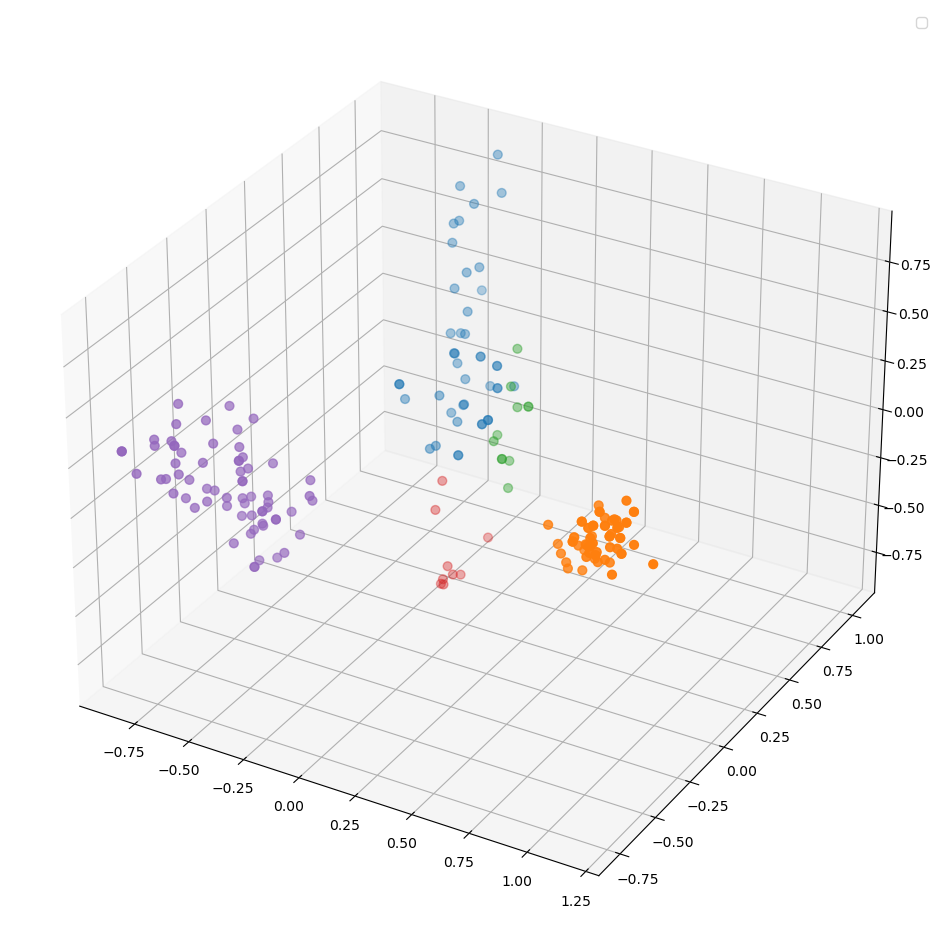

In [401]:
pca = PCA(n_components=3)
res = pca.fit_transform(stock2vec)
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter3D(res[:, 0], res[:, 1], res[:, 2], c=visDF.col, s=40)
ax.legend()